# PARTIE I : Génération du terrain du RPG



Il faudra en premier lieu créer un terrain à l'aide du logiciel Tiled Map Editor ou utiliser dans un premier celui fourni en exemple.
Lien vers map editor : https://www.mapeditor.org/

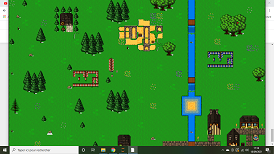

## I/ <u>Préparation de l'environnement de travail (suite)</u>

Normalement, le système de répertoires / fichiers se présente ainsi :
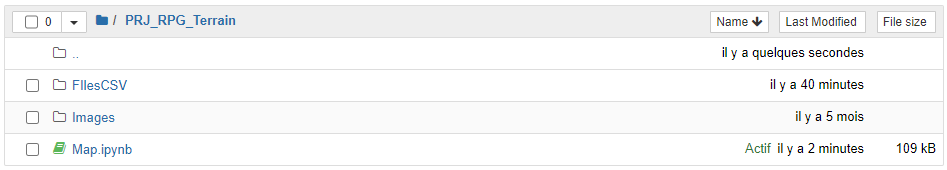

1/ <b>Monter</b> tous les fichiers <i>.csv</i> concernant la génération dans le sous-répertoire `FilesCSV`. On doit obtenir quelque chose comme ceci (ici avec les fichiers de base fournis) :
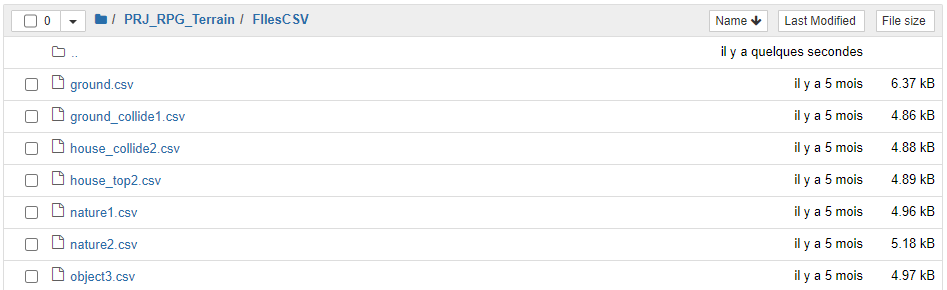

2/ <b>Monter</b> les jeux de tuiles dans le sous-répertoire `Images`. On doit obtenir quelque chose comme ceci (ici avec le fichier de jeu de tuiles de base fourni).
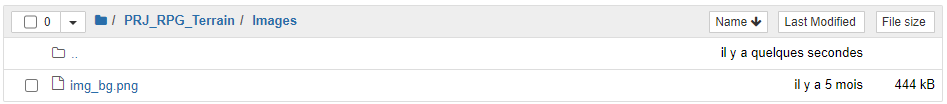


## II/ <u>Initialisation du programme</u>

La cellule suivante contient les instructions pour installer la bibliothèque `pygame` et l'initialisation de ses éléments.

<u>Remarques</u> : 

1/ l'instruction `!pip install pygame` n'est à lancer <b>qu'une seule fois en début de séance</b>. On mettra un <i>`#`</i> devant pour la passer en tant que commentaire.

2/ L'instruction `pygame.init()` est à lancer <b>une seule fois mais aussi en cas de plantage de noyau</b>.

In [8]:
# A NE FAIRE QU'UNE FOIS EN DEBUT DE SEANCE. Mettre un # devant après.
# Installe la bibliothèque pygame
#!pip install pygame 

# Importation de la bibliothèque pygame
import pygame

# Chargement des éléments
# A NE FAIRE QU'UNE FOIS SAUF SI LE NOYAU PLANTE ! METTRE un # sinon
pygame.init()

(7, 0)

Voici quelques constantes (ci-dessous) qui seront utiles pour le programme :

- `SCREEN_FLAGS` : permet de choisir le mode d'affichage, plein écran, fenêtré, proportionné. Le flag `pygame.SCALED` est un bon compromis. 
- `MAP_WIDTH` et `MAP_HEIGHT` : dimension de la carte, à modifier si besoin. Cela doit être un <b>multiple de 320</b> et <b>ne pas dépasser 3200 x 3200</b>.
- `WHITE`: il s'agit du code couleur en format RGB (red / green / blue) entre 0 et 255 pour chaque canal. Cette couleur correspond à celle associée à la <b>transparence</b> du jeu de tuile donc non affichée.
- `IMG_BG` : liste de tuples jeux de tuiles / couleur de transparence. Il peut y en avoir plusieurs.
- `FILES_ID_TILES` : dictionnaire de fichiers <i>.csv</i> associés à l'index de leur de jeu de tuile de `IMG_BG`. <b>Attention, ils seront affichés dans l'ordre des clés du dictionnaire</b>. 


3/ <b>Modifier/ Ajouter</b> les variables nécessaires pour les adapter à votre terrain.


In [9]:
# Quelques constantes relative à la map
SCREEN_FLAGS = pygame.SCALED   # Met à la taille optimale en mode fenêtré

MAP_TILE_SIZE = 32 # Taille d'un carré : NE PAS CHANGER


########### A MODIFIER EN FONCTION DE LA TAILLE DE LA MAP ##############
MAP_WIDTH = 1280 # Largeur de la map créée (40 tiles de 32 de taille)
MAP_HEIGHT = 1280 # Hauteur de la map créée (40 tiles de 32 de taille)


# Quelques couleurs (Transparence) en code RVB
####### A COMPLETER SI BESOIN ########
WHITE = (255,255,255)


# Noms des fichiers des jeux de tuiles + couleur de transparence
######## A MODIFIER SELON LES NOMS DES FICHIERS ################
IMG_BG =  [ ('Images/img_bg.png', WHITE) ] 


# Dictionnaire des fichiers des tiles à charger DANS L'ORDRE !!
# Les clés correspondent aux images de IMG_BG selon leur indice.
########### A MODIFIER SELON LES NOMS DES FICHIERS.CSV #########
FILE_ID_TILES = {'FilesCSV/ground.csv' : 0, 'FilesCSV/ground_collide1.csv' : 0, 'FilesCSV/nature1.csv' : 0, 
                 'FilesCSV/nature2.csv' : 0, 'FilesCSV/house_collide2.csv' : 0, 'FilesCSV/house_top2.csv' : 0, 
                 'FilesCSV/object3.csv' : 0}



<b>Les méthodes suivantes sont à compléter ci-dessous</b>.

4/ <b>Compléter</b> la méthode `set_tile_size(self,sz)` en s'aidant des commentaires.

5/ <b>Compléter</b> la méthode `set_list_ID_tiles(self, file_names)`. Il s'agit de charger une liste de fichiers <i>.csv</i> contenant les ID de chaque calque, d'où la variable `self.list_ID_tiles = []` qui est une liste de listes.

<u>Rappel</u> sur le chargement des fichiers <i>.csv</i> ici : https://github.com/lmayer65/NSI_T/blob/main/Programme_NSI_1/Repr%C3%A9sentation_Num%C3%A9rique_Donn%C3%A9es/Tables/RND.Tables.pdf (Page 2). <b>On notera qu'il n'y a pas de champs ici</b>.

In [14]:
# Représente les caractéristiques de chaque tile
class Tile : 
    def __init__(self, val, img) :
        self.num_ID = val      # ID de la tuile
        self.image = img       # Jeu de tuile utilisé
        self.map_coords = ()   # Coordonnées de la tuile sur la carte
        self.img_coords = ()   # Coordonnées de la tuile sur le jeu de tuile

        
        
# Agrège toutes les tuiles qui forment la map
class TiledMap :
    # Constructeur : longueur de carte, largeur de la carte, drapeaux (flags)
    def __init__(self, m_width, m_height, flags) :
        self.screen = pygame.display.set_mode( (m_width,m_height),flags)  # Mode d'affichage
        self.width = m_width   # Longueur de la carte
        self.height = m_height  # Largeur de la carte
        self.tile_size = 0 # Taille d'une tuile (32 à priori ?)
        self.imgs_bg = []  # Ensemble des images des jeux de tuiles
        self.tiles = []    # Ensemble des tuiles de tous les calques (liste de listes)
        self.tiles_to_draw = [] # Tuiles à afficher au format "(surface,origine,destination)"
        
    
    # Mise à jour de la taille d'une tuile (32 à priori)
    ################## A COMPLETER #####################
    def set_tile_size(self, sz)  :
        ...

      
    # Charge les ID des fichiers.csv permettant de composer la map  
    def set_list_ID_tiles(self, file_names) :   
        # Cette liste de listes contient les ID de chaque calque.
        self.list_ID_tiles = []
        
        # Parcours de chaque fichier de la liste des fichiers.csv.
        for f_name in file_names :
            # Ouverture de chaque fichier en mode lecture
            ...   
            # Conversion de chaque ligne en liste
            lines = ...  
 
            ID_by_layer = [] # Récupère les ID par calque
            for line in lines :
                ...
                for val in liste : 
                    ...      # Penser à convertir `val` en entier avec int(val) !
                        
            self.list_ID_tiles.append(ID_by_layer)
            
            # Fermeture du fichier ouvert
            ... 
            
                 
    
    # Génération de la map
    def set_tiles(self) :
        nb_tile_lines = MAP_HEIGHT // self.tile_size
        nb_tiles_columns = MAP_WIDTH // self.tile_size
        
        
        # Dictionnaire pour gérer les (plusieurs éventuelles) images nécessaires pour créer la map
        for file_name,img_ID in FILE_ID_TILES.items() :
            img_width,img_height = self.imgs_bg[img_ID].get_size()
            nb_img_lines = img_height // self.tile_size
            nb_img_columns = img_width // self.tile_size                                 
            tiles_by_layer = []
                                                
            for i in range(0,nb_tile_lines) :
                for j in range(0,nb_tiles_columns) :
                    ID = self.list_ID_tiles[list(FILE_ID_TILES.keys()).index(file_name)][i*nb_tiles_columns + j]
                    tile = Tile(-1,self.imgs_bg[img_ID])
                    tile.map_coords = (j*self.tile_size,i*self.tile_size) # Attention aux coordonnées
                    tile.num_ID = ID
                    tile.image = self.imgs_bg[img_ID]
                    tile.img_coords = ( self.tile_size*(ID % nb_img_columns), self.tile_size*(ID // nb_img_columns) ) 
                            
                    tiles_by_layer.append(tile)
            
            self.tiles.append(tiles_by_layer)
            
            # Permet d'utiliser la fonction `blits(arg1,arg2,arg3)` : arg1 = jeu de tuile courant, 
            # arg2 = coordonnées de la tuile sur la map, arg3 = coordonnées de la tuile sur le jeu de tuile 
            # et dimensions.
            for tiles in self.tiles :
                for tile in tiles :
                    self.tiles_to_draw.append( (tile.image, (tile.map_coords[0], tile.map_coords[1]), \
                        (tile.img_coords[0], tile.img_coords[1], self.tile_size, self.tile_size))  )
        
                  
    # Charge les jeux de tuiles du terrain
    def load_imgs_bg(self) :
        for f_nam,col_set in IMG_BG :
            # Chargement de l'image + prise en charge du canal alpha (affichage en transparence éventuelle)
            alone_img_bg = pygame.image.load(f_nam).convert_alpha() 
            alone_img_bg.set_colorkey(col_set) # Couleur de la transparence
            
            self.imgs_bg.append(alone_img_bg)
    
   
    # Dessine le terrain      
    def draw(self) :
        # Dessine le tableau de tuile en une fois
        self.screen.blits(self.tiles_to_draw)
    

6/ Les ... suivants sont à compléter ci-dessous.

In [15]:
# Charge le nécessaire pour afficher la fenêtre et les composants
pygame.display.init()

# Chargement de la map
######## CREER ICI L'OBJET `tiled_map` instance de la classe `TiledMap`
tiled_map = ...

####### METTRE LA TAILLE DES TUILES à MAP_TILE_SIZE ICI ############### 
...

####### APPELER LA METHODE POUR CHARGER LES IMAGES DU TERRAIN #########
...

####### APPELER LA METHODE POUR CHARGER LES FICHIERS.CSV #########
tiled_map.set_list_ID_tiles(FILE_ID_TILES)

tiled_map.set_tiles()
print("Tiled map charged")


# Vérifie si le jeu tourne
is_running = True

# Boucle non bornée, la sortie d'effectue en cliquant
# sur la croix de la fenêtre.
while(is_running) :
    
    # Clic sur la croix de la fenêtre pour quitter
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            is_running = False
         
        
    # Limite le FPS à 50 : inutile d'afficher en boucle !             
    pygame.time.wait(20)
    
    # Dessin du terrain (en mémoire)
    #### APPELER LA METHODE POUR DESSINER LE TERRAIN #####
    ...
    
    # Affichage du terrain sur l'écran
    pygame.display.flip()


# Quitte le jeu proprement
pygame.display.quit()

Tiled map charged


7/ <b>Exécuter</b> le programme et vérifier que le terrain s'affiche correctement.